In [ ]:
import procanCorke as pc

In [11]:
import numpy as np
import math
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath.base import *
from spatialmath import SE3

pi = math.pi
#d*Rz*a*Rx

'''
l0 = ET.tz(0.0294)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.tx(-0.0019)*ET.tz(-0.0904)*ET.Rx(pi/2)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link
link0 = Link(l0, name='link1', m=0.029, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = Link(l1, name='link2', parent=link0, m=1.108, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)
link2 = Link(l2, name='link3', parent=link1, m=0.0389, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = Link(l3, name='link4', parent=link2, m=0.0389, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = Link(l4, name='link5', parent=link3, m=0.1404, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)
link5 = Link(l5, name='link6', parent=link4, m=0.3118, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)
'''

#rtb.robot.RevoluteDH(a=-0.116),
link0 = rtb.robot.RevoluteDH(d=0.0294, alpha=pi/2, qlim=np.array([-pi/2,pi]),m=0.029, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = rtb.robot.RevoluteDH(a=0.23, qlim=[0,pi], m=1.108, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)# alpha=pi),
link2 = rtb.robot.RevoluteDH(d=-0.00286, a=0.17213,alpha=pi/2, qlim=[0,pi],flip=True, m=0.0389, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = rtb.robot.RevoluteDH(a=0.0019, alpha=-pi/2, qlim=[0,pi], m=0.0389, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = rtb.robot.RevoluteDH(a=0.0438, alpha=pi/2, qlim=[-pi/2,pi], m=0.1404, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)#,
link5 = rtb.robot.RevoluteDH(alpha=pi/2, qlim=[-pi,pi],m=0.3118, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)

robot = rtb.robot.DHRobot([link0,link1,link2,link3,link4,link5],name="PROCaN", manufacturer="Vitor Domingues", base = SE3(-0.116,0,0))
robot.addconfiguration_attr("q30", [0.0, 0.5, 0.5, 0.5, 0, 0])


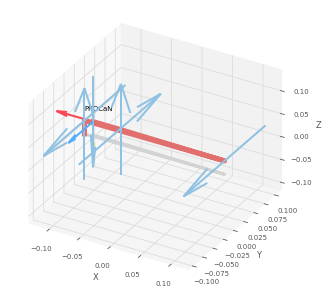

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [10]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qz = [0,0,pi,0,0,0]  
robot.plot(qz)

In [17]:
q = [0,0,pi,-pi/2,pi,-pi/2]
robot.inertia(q)
#robot.r

[[[ 8.77110542e-02  1.63803825e-03  1.63804192e-03  4.76418709e-03
   -1.55724335e-06 -2.65215643e-03]
  [ 1.63803825e-03  8.74048168e-02  2.34544755e-03  1.76505153e-03
    2.93440324e-03 -2.81447483e-06]
  [ 1.63804192e-03  2.34544755e-03  1.30577459e-02  1.76505153e-03
   -1.83939912e-03 -2.81447483e-06]
  [ 4.76418709e-03  1.76505153e-03  1.76505153e-03  5.30312594e-03
    4.46388470e-07 -3.13535496e-03]
  [-1.55724335e-06  2.93440324e-03 -1.83939912e-03  4.46388470e-07
    6.46269762e-03 -4.46388470e-07]
  [-2.65215643e-03 -2.81447483e-06 -2.81447483e-06 -3.13535496e-03
   -4.46388470e-07  3.13405244e-03]]]


array([[ 8.77110542e-02,  1.63803825e-03,  1.63804192e-03,
         4.76418709e-03, -1.55724335e-06, -2.65215643e-03],
       [ 1.63803825e-03,  8.74048168e-02,  2.34544755e-03,
         1.76505153e-03,  2.93440324e-03, -2.81447483e-06],
       [ 1.63804192e-03,  2.34544755e-03,  1.30577459e-02,
         1.76505153e-03, -1.83939912e-03, -2.81447483e-06],
       [ 4.76418709e-03,  1.76505153e-03,  1.76505153e-03,
         5.30312594e-03,  4.46388470e-07, -3.13535496e-03],
       [-1.55724335e-06,  2.93440324e-03, -1.83939912e-03,
         4.46388470e-07,  6.46269762e-03, -4.46388470e-07],
       [-2.65215643e-03, -2.81447483e-06, -2.81447483e-06,
        -3.13535496e-03, -4.46388470e-07,  3.13405244e-03]])

In [3]:
import math
pi = math.pi
#pc.T_func(0,0,pi,-pi/2,pi)#,-pi/2)    #d*Rz*a*Rx (começa a contar da base)

In [ ]:
q = [0,0,pi,-pi/2,pi,-pi/2]
qr = [0,0,pi/2,0,0,0]
qz = [0,0,pi,0,0,0]
pc.robot.plot(qz)

In [ ]:
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
pc.T_func(0,0,0,pi)#,pi,-pi/2)@Pa

In [4]:
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3

puma = rtb.models.DH.Puma560(symbolic=True)

In [5]:
puma

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬───────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼───────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  pi/2 │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │     0 │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -pi/2 │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  pi/2 │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -pi/2 │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │     0 │ -266.0° │ 266.0° │
└────┴────────┴────────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────────────────────┬───────────────────────┬─────┬──────────────────────┬─────┐
│name │ q0  │ q1                   │ q2                    │ q3  │ q4                   │ q5  │
├─────┼─────┼──────────────────────┼───────────────────────┼─────┼──────────────────────┼─────┤
│  qr │  0° │ 28.6478897565412*pi° │ -28.6478897565412*pi° │  0° │  0°          

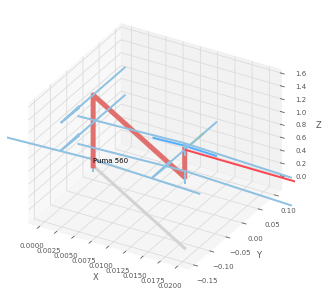

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [3]:
puma.plot(puma.qr)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
puma.plot(puma.qz)
#puma.plot([-0.5,0,0.5,0.5,0,-0.5])

In [ ]:
panda = rtb.models.Panda()
panda.plot(panda.q,block=True)

In [ ]:
import roboticstoolbox as rtb

robot = rtb.models.DH.Panda()  # create a robot

pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.add(robot)              # add the robot to the backend
robot.q = robot.qz             # set the robot configuration
pyplot.step()                  # update the backend and graphical view

ERobot: PROCaN (by Vitor Domingues), 6 joints (RRRRRR), dynamics
┌─────┬────────┬───────┬────────┬──────────────────────────────────────────────┐
│link │  link  │ joint │ parent │             ETS: parent to link              │
├─────┼────────┼───────┼────────┼──────────────────────────────────────────────┤
│   0 │ lBase  │       │ BASE   │ tx(-0.116)                                   │
│   1 │ link1  │     0 │ lBase  │ tz(0.0294) ⊕ Rz(q0)                          │
│   2 │ link2  │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)                             │
│   3 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rz(q2)                            │
│   4 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ Rz(q3)              │
│   5 │ link5  │     4 │ link4  │ tx(-0.0019) ⊕ tz(-0.0904) ⊕ Rx(90°) ⊕ Rz(q4) │
│   6 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                │
└─────┴────────┴───────┴────────┴──────────────────────────────────────────────┘

┌─────┬────────┬────────┬────────┬────────┬

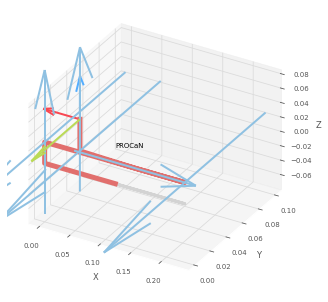

<Figure size 432x288 with 0 Axes>

In [1]:
#DESCRIÇÃO DO PROCAN NO MODELO EROBOT

import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath import SE3
from spatialmath.base import *
import spatialmath.base.symbolic as sym
import math

pi = math.pi

base = SE3(0.116,0,0)
lb = ET.tx(-0.116)
l0 = ET.tz(0.0294)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.tx(-0.0019)*ET.tz(-0.0904)*ET.Rx(pi/2)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link
Base = Link(lb, name='lBase', m=0.20)
link0 = Link(l0, name='link1', qlim=[-pi/2,pi], parent=Base, m=0.029, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = Link(l1, name='link2', qlim=[0,pi], parent=link0, m=1.108, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)
link2 = Link(l2, name='link3', qlim=[0,1.5], parent=link1, m=0.0389, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = Link(l3, name='link4', qlim=[0,pi], parent=link2, m=0.0389, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = Link(l4, name='link5', qlim=[0,pi], parent=link3, m=0.1404, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)
link5 = Link(l5, name='link6', qlim=[0,pi], parent=link4, m=0.3118, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)

procan = ERobot([Base,link0,link1,link2,link3,link4,link5],name='PROCaN',manufacturer='Vitor Domingues',base=base, gravity=[0,0,0])

procan.addconfiguration_attr("q30", [0.5,0.5,0.5,0.5,0.5,0.5])

print(procan)
qr = [0,0,pi,1.57,pi,1.57]
q30 = [0.5,0.5,0.5,0.5,0.5,0.5]
procan.plot(qr)
q = sym.symbol('ϴ_:6')#_:6')
#q = sym.symbol('φ,ϴ,ψ,α,β,γ')
T = procan.fkine(q)
Ts = T.simplify()

In [2]:
M = Matrix(Ts.A)
Ms = nsimplify(M,tolerance=1e-4)
#Ms

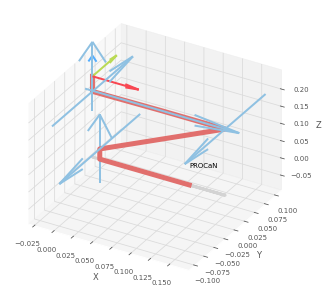

   1         0.0007963  0        -0.009495  
  -0.0007963  1        -0.0007963 -3.337e-05  
  -6.341e-07  0.0007963  1         0.2339    
   0         0         0         1         


<Figure size 432x288 with 0 Axes>

In [46]:
from sympy import lambdify
from spatialmath import SO3
T_func = lambdify(q, Ms, modules='numpy')
tee = T_func(0,pi/4,0.75*pi,-1.57,0,1.57)
mee = procan.fkine([0,pi/4,0.75*pi,-1.57,0,1.57])
procan.plot([0,pi/4,0.75*pi,-pi/2,0,pi/2])
t_cubo_base = tee * SE3(0.191,0.039,-0.217)
m_cubo_base = mee * SE3(0.191,0.039,-0.217)
#SE3(0.191,0.039,-0.217)
#tee
t_cubo_base = SE3(t_cubo_base)
mee
#Ms[:3,3]

In [7]:
from spatialmath.base import *
from spatialmath import SE3
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
I = np.eye(4)
I = np.insert(I,3,[0.2,0.2,0.2,1],axis=1)
Pa = np.delete(I,4,1)
Pa = SE3(0.2,0.2,0.2)
Pc = SE3(-0.167,0.0247,0.4168)
xis,ips,zed = sym.symbol('x,y,z')
Pq = SE3(xis,ips,zed)
#Ms*Pa
#print(Pa)
Pq

   1         0         0        x             
   0         1         0        y             
   0         0         1        z             
   0         0         0         1         


In [ ]:
pose = procan.fkine_all(q)
desloc = pose
#desloc

In [43]:
#https://github.com/petercorke/robotics-toolbox-python/wiki/Kinematics

#sol = procan.ikine_LMS(Pc)
sol = procan.ikine_LMS(m_cubo_base)
sol

IKsolution(q=array([ 0.21184062,  0.52557216, -2.16253715,  1.58239795,  1.63713695,
       -1.79500912]), success=True, reason=None, iterations=15, residual=4.682228218744594e-11)

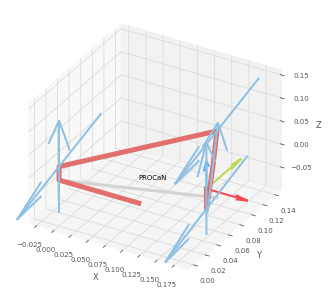

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [44]:
procan.plot(sol[0])

In [14]:
#retorna os angulos das juntas em graus
for item in sol[0]:
    print((item/3.1415)*180)

45.00132765349501
57.321969274360484
-79.52102891486904
90.00265441062916
22.199061418637218
-135.0039820809895


In [33]:
J = procan.jacob0(q)
J = nsimplify(J,tolerance=1e-4,rational=True)
J[0]

[-(((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*sin(ϴ_0) + ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*cos(ϴ_0) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_0)*cos(ϴ_3))*cos(ϴ_0))*sin(ϴ_0) - (((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) + ((1234/7169 - 219*sin(ϴ_4)/5000)*cos(ϴ_2) - (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_2)*sin(ϴ_3) + 23/100)*cos(ϴ_1))*sin(ϴ_0) - (219*cos(ϴ_4)/5000 - 19/10000)*cos(ϴ_0)*cos(ϴ_3))*cos(ϴ_0) - ((-((1234/7169 - 219*sin(ϴ_4)/5000)*sin(ϴ_2) + (219*cos(ϴ_4)/5000 - 19/10000)*sin(ϴ_3)*cos(ϴ_2))*sin(ϴ_1) +

In [2]:
import numpy as np
#vector = np.vectorize(np.int_)
#puma = rtb.models.DH.Puma560()
#procan.gravity = [0,0,0]
qd = sym.symbol('ϴd_:6')
qdd = sym.symbol('ϴdd_:6')
z = np.array([[0],[0],[0],[0],[0],[0]])
#z = vector(z)
#qp = np.array([[0.5],[0.5],[0.5],[0.5],[0.5],[0.5]])
qp = np.array([0.5,0.5,0.5,0.5,0.5,0.5])
#qp = vector(qp)
qpp = qp

n = len(qp)

mat = (np.c_[qp] @ np.ones((1,n))).T
#a funcao rne() so aceita entrada de arrays multidimensionais para robos definidos em DH
#tau = procan.rne(mat,0.5+np.zeros((6,)),0.5+np.zeros((6,)))
tau = procan.rne(qp,0.5+np.zeros((6,)),0.5+np.zeros((6,)))
#tauS = procan.rne(q,qd,qdd,symbolic=True,gravity=np.array([0,0,0]))
#%time tau = procan.rne_python(q, qd, qdd)
#pc.robot.accel(qp,0.5 * np.ones(6), np.zeros(6))
#pc.robot.inertia(qp)

In [ ]:
#procan.dynamics()
#procan.coriolis_x(qp,qp)
print(tau)

In [37]:
qr = np.array([0,0,pi,1.57,pi,1.57])
qz = np.zeros((6,))

#procan.inertia(qr)
procan.rne(qr,np.zeros((6,)),3+np.zeros((6,)))

array([ 0.01308664,  0.00601741,  0.026046  , -0.0014515 ,  0.00475777,
        0.00030665])

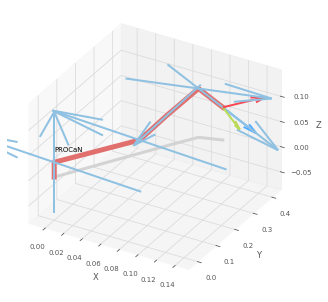

erro em  0 =  [-1.77608151 -3.12837305 -0.44557891 -1.15013366 -2.94503562  2.45523313]


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

In [16]:
qa = procan.qrandom
procan.plot(qa)
procan.inertia(qa)

In [6]:
import roboticstoolbox as rtb
robot = rtb.models.DH.Puma560()
#print(robot)
#qr = np.array([[0, 0, 0, 0, 0, 0, 0],[0,0,pi,1.57,pi,1.57, 0]])
robot.inertia(robot.qr)

array([[ 2.33735105e+00, -8.29305154e-01, -1.38913810e-01,
         1.64000000e-03, -4.32144000e-04,  4.00000000e-05],
       [-8.29305154e-01,  5.20694800e+00,  7.47899277e-01,
         9.73037481e-19,  3.12932800e-03,  2.44929360e-21],
       [-1.38913810e-01,  7.47899277e-01,  9.38652730e-01,
         5.61100343e-19,  1.88574400e-03,  2.44929360e-21],
       [ 1.64000000e-03,  9.73037481e-19,  5.61100343e-19,
         1.92430626e-01,  2.08189956e-20,  4.00000000e-05],
       [-4.32144000e-04,  3.12932800e-03,  1.88574400e-03,
         2.08189956e-20,  1.71348452e-01,  2.44929360e-21],
       [ 4.00000000e-05,  2.44929360e-21,  2.44929360e-21,
         4.00000000e-05,  2.44929360e-21,  1.94104506e-01]])

In [15]:
robot.coriolis(robot.qz,robot.qr)

array([[-1.11513973e-02, -1.08446419e+00,  1.21430643e-17,
        -2.62271362e-17,  3.40612158e-19, -3.40612158e-19],
       [-4.35983562e-17,  6.06515686e-01,  0.00000000e+00,
         0.00000000e+00,  4.33680869e-17,  0.00000000e+00],
       [ 0.00000000e+00,  6.06515686e-01, -2.72489726e-18,
         0.00000000e+00,  3.22279096e-17,  0.00000000e+00],
       [-3.78155460e-34,  6.47069343e-19, -1.28194712e-33,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.95341718e-03,  2.43945489e-19,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
import numpy as np
robot.dynamics()

┌──────┬────┬────────────┬────────────────────────┬────┬────┬────────┬────┐
│  j   │ m  │     r      │           I            │ Jm │ B  │   Tc   │ G  │
├──────┼────┼────────────┼────────────────────────┼────┼────┼────────┼────┤
│link1 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link2 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link3 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link4 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link5 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link6 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
│link7 │  0 │  0,  0,  0 │  0,  0,  0,  0,  0,  0 │  0 │  0 │  0,  0 │  0 │
└──────┴────┴────────────┴────────────────────────┴────┴────┴────────┴────┘



In [9]:
#calculo da focal length:
def FocalLength(measured_distance, real_width, width_in_rf_image):

    focal_length = (width_in_rf_image* measured_distance)/ real_width

    return focal_length
#valores em mm ou px
dist = 100
larg = 56
lpx = 640 #largura em pixels

In [10]:
FocalLength(dist,larg,lpx)

1142.857142857143